In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

frost_days_df = pd.read_csv('all/frostDays.csv')
frost_days_df.head()

,Year,Month,State,City,AVG_Frost_Days
0,2006,January,MD,Adelphi,23.333333
1,2006,February,MD,Adelphi,16.000000
2,2006,March,MD,Adelphi,12.809524
3,2006,April,MD,Adelphi,2.619048
4,2006,May,MD,Adelphi,0.095238


            AVG_Frost_Days
Date                      
2006-01-01       23.333333
2006-02-01       16.000000
2006-03-01       12.809524
2006-04-01        2.619048
2006-05-01        0.095238


(0.0, 13.0)

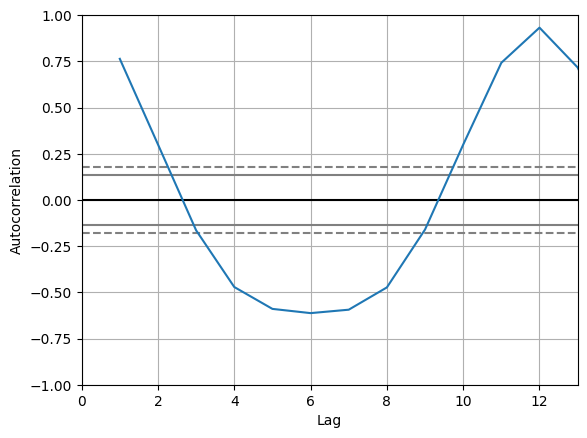

In [2]:
frost_adelphi = frost_days_df[frost_days_df['City'] == 'Adelphi']

col_name = 'AVG_Frost_Days'

t = pd.Series.to_frame(pd.to_datetime(frost_adelphi['Year'].astype(str) + frost_adelphi['Month'], format='%Y%B'), name="Date")
frost = pd.Series.to_frame(frost_adelphi[col_name])
df = t.merge(frost, right_index=True, left_index=True)

df = df.set_index('Date')
print(df.head())
ax = autocorrelation_plot(df)
ax.set_xlim((0, 13))

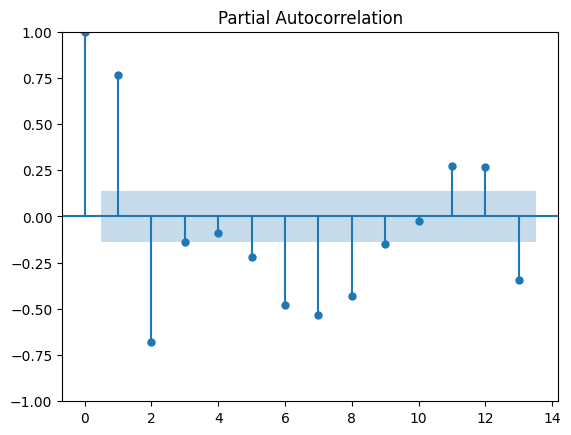

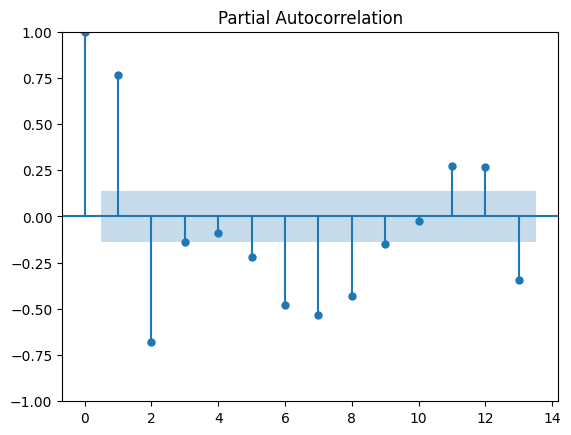

In [3]:
plot_pacf(df, lags=13)

<Figure size 640x480 with 0 Axes>

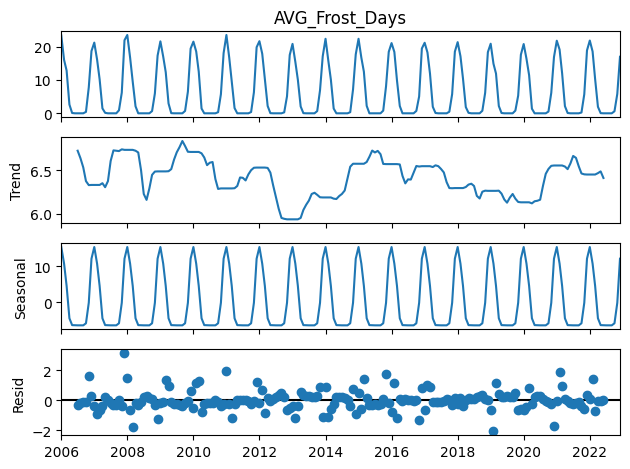

In [4]:
decomposition = seasonal_decompose(df[col_name], period=12, extrapolate_trend=0)

figure = plt.figure()  
figure = decomposition.plot()  

In [6]:
# source for Dickey-Fuller and SARIMA paremeter testing: https://www.wisdomgeek.com/development/machine-learning/sarima-forecast-seasonal-data-using-python/
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# paramlist = []
# i = 0
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(df,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             paramlist.append((param, param_seasonal, results.aic))
#         except:
#             continue
    
# print("done")
# print(paramlist)
# print(sorted(paramlist, key= lambda x: (_,_,x), reverse=True))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [12]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

train = df[:'2019-10-01']

model = ARIMA(train, order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))

# real = ARIMA(df, order=(0,1,0), seasonal_order=(0,1,0, 12))

# real_fit = real.fit()
# real_res = pd.DataFrame(real_fit.resid)


# print(df.head())
# print(res.head())
# combined = real_res.merge(res, left_on='dt', right_on='dt', how='outer')
# combined.plot()
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# print((res.mean()))

c:\Users\School\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

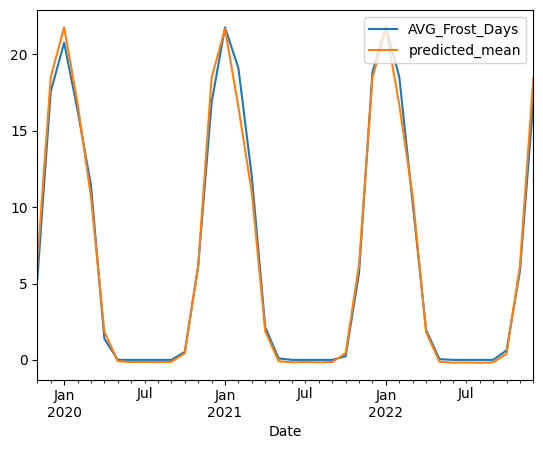

In [13]:
fit = model.fit()
res = pd.DataFrame(fit.resid)

prediction = fit.forecast(38)
# pdf = pd.DataFrame(prediction)
pmerge = df.merge(prediction, left_on='Date', right_index=True, how='outer')
# pmerge.plot()

prediction_plot = pmerge['2019-11-01':]
prediction_plot.plot()

In [16]:
mse = mean_squared_error(df['2019-11-01':], prediction)
print(mse)

0.5539664434008651
